In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

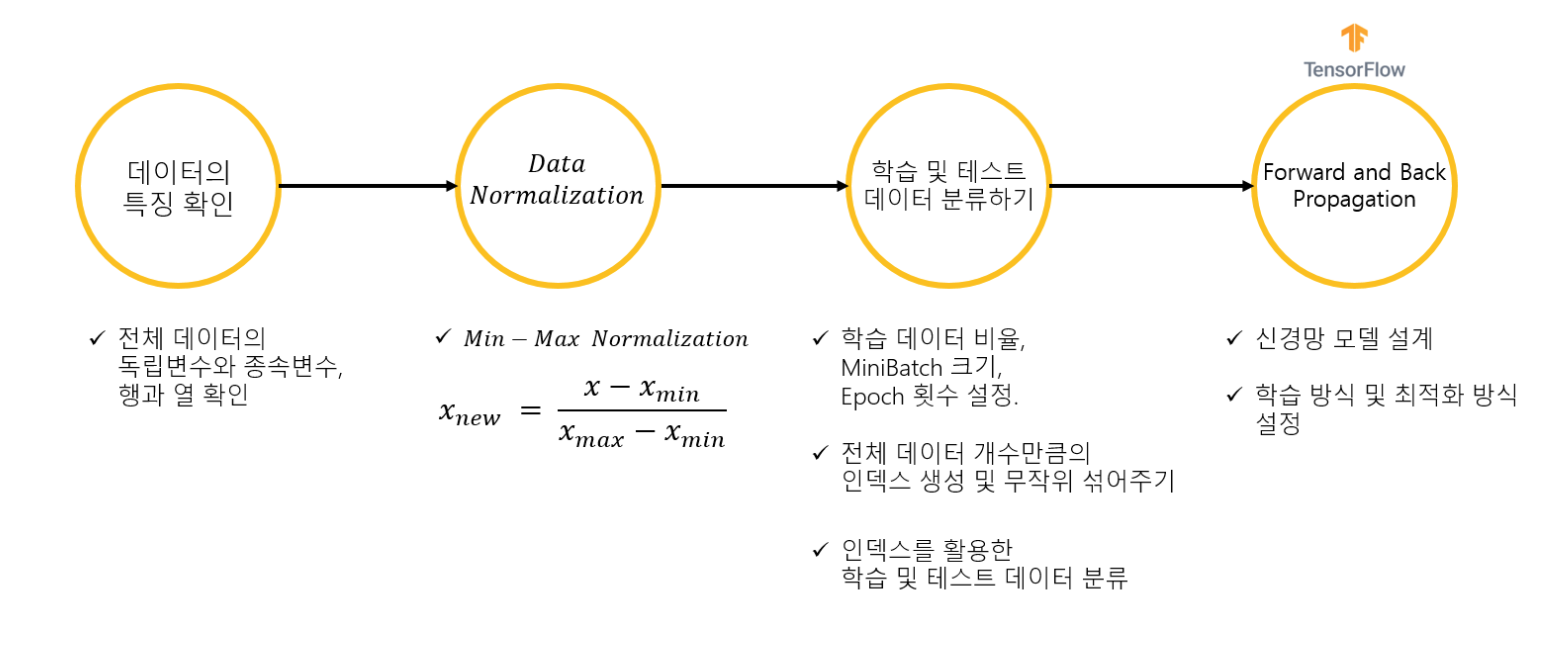

In [3]:
#데이터 판다스로 읽어오기 
faults = pd.read_csv('/content/faults_mini.csv')
faults.head()

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,42,270900,267,80,1,0,0
1,1084,185575,108,40,0,0,1
2,1109,1170194,130,175,0,1,0
3,190,210936,132,150,1,0,0
4,330,429227,264,150,1,0,0


In [4]:
#데이터 통계값 확인 
faults.describe()

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
count,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,336.800000,4.980733e+05,1102.300000,96.500000,0.400000,0.300000,0.300000
std,419.946769,3.014717e+05,1591.202973,53.750969,0.516398,0.483046,0.483046
min,42.000000,1.855750e+05,108.000000,40.000000,0.000000,0.000000,0.000000
25%,48.750000,2.948952e+05,133.750000,47.500000,0.000000,0.000000,0.000000
50%,132.000000,4.033820e+05,265.500000,75.000000,0.000000,0.000000,0.000000
75%,380.250000,5.998238e+05,1240.500000,150.000000,1.000000,0.750000,0.750000
max,1109.000000,1.170194e+06,4048.000000,175.000000,1.000000,1.000000,1.000000


In [30]:
#데이터 + 이상치 를 만들기 
var_x_outlier = [100]
var_x = np.random.randint(0,7,size = 99)

var_x = np.hstack([var_x,var_x_outlier])
var_y = np.random.randint(0,40,size = 100)

print(var_x)
print(var_y)

'''
정규화 시키기  = x의 원소  - x의 원소 중에 최소 / x의 원소 중에 최대  - x의 원소중에 최소
''' 
var_x_norm = (var_x - var_x.min()) / (var_x.max() - var_x.min())
var_y_norm = (var_y - var_y.min()) / (var_y.max() - var_y.min())

print(var_x_norm)
print(var_y_norm)

[  3   3   6   1   0   3   5   4   6   3   4   2   1   4   4   6   2   3
   1   0   1   1   2   0   0   2   3   5   6   1   0   4   3   3   4   2
   0   0   6   3   1   3   5   4   3   6   0   5   5   1   4   6   6   4
   4   2   2   1   0   6   3   1   3   0   1   3   3   4   2   3   1   6
   2   2   0   6   0   2   2   5   0   4   3   6   2   1   3   0   4   0
   4   2   3   5   3   3   6   3   5 100]
[29  7  5 16 28 15  4  8 16 28 10 15 29 34 39 18 33 25 34  3 15  6 12 10
 33 19 22 35 11  7 37  2 18 34  1 33  6  6 28 13 26 19 39 22 12 25 38 28
  1 13 18 24 34 21  5 26 19  0 28 34  0 11  9  0 13 21 32 35 32 25 29 11
 23 35 23  5 37 13 17 20  2 10  8 36 39 31  7 32 27 22 13 26  8  6 37 17
  4  3  7 34]
[0.03 0.03 0.06 0.01 0.   0.03 0.05 0.04 0.06 0.03 0.04 0.02 0.01 0.04
 0.04 0.06 0.02 0.03 0.01 0.   0.01 0.01 0.02 0.   0.   0.02 0.03 0.05
 0.06 0.01 0.   0.04 0.03 0.03 0.04 0.02 0.   0.   0.06 0.03 0.01 0.03
 0.05 0.04 0.03 0.06 0.   0.05 0.05 0.01 0.04 0.06 0.06 0.04 0.04 0.02
 0.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


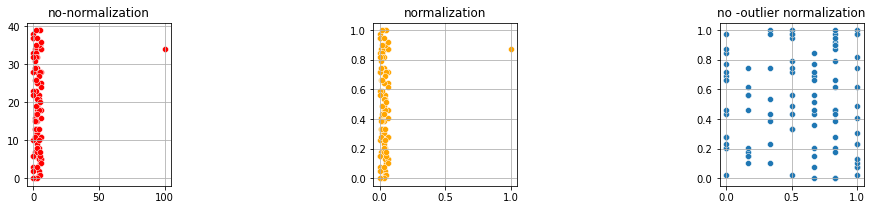

In [31]:
#matplotlib 로 데이터 학습 하기 
plt.figure(figsize = (15,3)) #정규화를 하지 않은 데이터
plt.subplot(1,5,1)
sns.scatterplot(var_x,var_y,color = 'red')
plt.title('no-normalization')
plt.grid()


plt.subplot(1,5,3)  #정규화를 시킨 데이터 이상치는 있음
sns.scatterplot(var_x_norm,var_y_norm,color = 'orange')
plt.title('normalization')
plt.grid()

#이상치를 뺸 데이터로 만들기 
var_x1 = np.random.randint(0,7,size = 100)
var_y1 = np.random.randint(0,40,size = 100)
#이상치를 뺸 데이터 로 시각화
x_norm = (var_x1 - var_x1.min()) / (var_x1.max() - var_x1.min())
y_norm = (var_y1 - var_y1.min()) / (var_y1.max() - var_y1.min())
plt.subplot(1,5,5)
sns.scatterplot(x_norm,y_norm)
plt.title('no -outlier normalization')
plt.grid()
plt.show()



In [32]:
faults_norm = (faults - faults.min()) / (faults.max() - faults.min())
faults_norm.head() #실제 학습 데이터에 최적화를 적용 

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,0.000000,0.086658,0.040355,0.296296,1.0,0.0,0.0
1,0.976570,0.000000,0.000000,0.000000,0.0,0.0,1.0
2,1.000000,1.000000,0.005584,1.000000,0.0,1.0,0.0
3,0.138707,0.025757,0.006091,0.814815,1.0,0.0,0.0
4,0.269916,0.247458,0.039594,0.814815,1.0,0.0,0.0


In [33]:
faults_norm.describe()

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.276289,0.317380,0.252360,0.418519,0.400000,0.300000,0.300000
std,0.393577,0.306181,0.403859,0.398155,0.516398,0.483046,0.483046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006326,0.111028,0.006536,0.055556,0.000000,0.000000,0.000000
50%,0.084349,0.221209,0.039975,0.259259,0.000000,0.000000,0.000000
75%,0.317010,0.420720,0.287437,0.814815,1.000000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# pandas data 
faults_shuffle = faults_norm.sample(frac = 1)
print(faults_norm)
print('-------------------------------------------------------------')
print(faults_shuffle)

   X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
0   0.000000   0.086658      0.040355  ...     1.0        0.0       0.0
1   0.976570   0.000000      0.000000  ...     0.0        0.0       1.0
2   1.000000   1.000000      0.005584  ...     0.0        1.0       0.0
3   0.138707   0.025757      0.006091  ...     1.0        0.0       0.0
4   0.269916   0.247458      0.039594  ...     1.0        0.0       0.0
5   0.029991   0.602841      0.354822  ...     1.0        0.0       0.0
6   0.008435   0.406539      0.007868  ...     0.0        1.0       0.0
7   0.332709   0.425447      0.085279  ...     0.0        1.0       0.0
8   0.000937   0.184138      1.000000  ...     0.0        0.0       1.0
9   0.005623   0.194961      0.984010  ...     0.0        0.0       1.0

[10 rows x 7 columns]
-------------------------------------------------------------
   X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
1   0.976570   0.000000      0.000000  ...     0.0 

In [36]:
#pandas data 를 넘파이로 바꾸기 
faults_np = faults_shuffle.to_numpy()
print(type(faults_np))

<class 'numpy.ndarray'>


In [38]:
#train_test_split

train_ratio = 0.8
input_cnt = 4 #input_data 의 수
output_cnt = 3 #output_data 의 수

train_idx = int(len(faults_np) * train_ratio)
print(train_idx)

8


In [41]:
#train_test_split and printing

train_x,train_y = faults_np[:train_idx,:-output_cnt],faults_np[:train_idx,-output_cnt:]
test_x,test_y = faults_np[train_idx: , :-output_cnt],faults_np[train_idx:,-output_cnt:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(8, 4)
(8, 3)
(2, 4)
(2, 3)


In [44]:
#신경망 구축 

epochs = 25
minibatch = 2
learning_rate = 0.001

simple_layer_model = tf.keras.Sequential([
                                          tf.keras.layers.Dense(units = 3, #input data 와 w 가중치 를 곱한 결과 3개
                                                                activation = 'softmax', #활성화 함수 
                                                                input_shape = (4,)) #x input 값을 
])
simple_layer_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [48]:
#model compile
simple_layer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss = 'categorical_crossentropy')

In [49]:
#loss function 을 만든다.
history = simple_layer_model.fit(train_x,train_y,epochs = 25,batch_size=2)


Epoch 1/25
4/4 [==============================] - 0s 2ms/step - loss: 1.0399
Epoch 2/25
4/4 [==============================] - 0s 2ms/step - loss: 1.0373
Epoch 3/25
4/4 [==============================] - 0s 2ms/step - loss: 1.0345
Epoch 4/25
4/4 [==============================] - 0s 2ms/step - loss: 1.0324
Epoch 5/25
4/4 [==============================] - 0s 2ms/step - loss: 1.0303
Epoch 6/25
4/4 [==============================] - 0s 2ms/step - loss: 1.0280
Epoch 7/25
4/4 [==============================] - 0s 2ms/step - loss: 1.0263
Epoch 8/25
4/4 [==============================] - 0s 3ms/step - loss: 1.0242
Epoch 9/25
4/4 [==============================] - 0s 3ms/step - loss: 1.0223
Epoch 10/25
4/4 [==============================] - 0s 3ms/step - loss: 1.0201
Epoch 11/25
4/4 [==============================] - 0s 3ms/step - loss: 1.0180
Epoch 12/25
4/4 [==============================] - 0s 2ms/step - loss: 1.0158
Epoch 13/25
4/4 [==============================] - 0s 4ms/step - loss: 1.

In [50]:
#test data 평가 
simple_layer_model.evaluate(test_x,test_y)

1/1 [==============================] - 0s 106ms/step - loss: 1.0959


1.0958826541900635

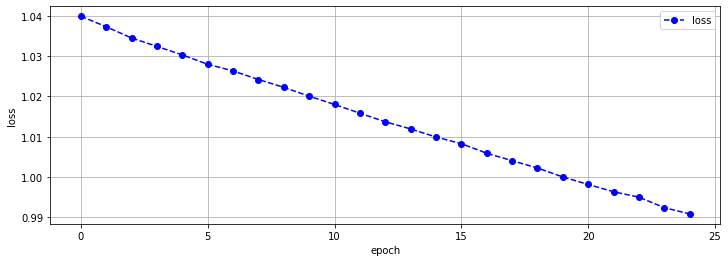

In [52]:
#matplot 함수로 loss 값 표시 

plt.figure(figsize = (12,4))
plt.plot(history.history['loss'],'b--o',label = 'loss')
#history.history['loss'] = 모델 학습 결과 
plt.xlabel('epoch')
plt.ylabel('loss')

plt.grid()
plt.legend()
plt.show()

In [54]:
predict_y = simple_layer_model.predict(test_x)
print(predict_y)
print('----------------------------------------------')
print(test_y)

pred_y = np.argmax(predict_y,axis = 1)
print(pred_y)

[[0.39018896 0.4439465  0.16586454]
 [0.2650528  0.2863212  0.44862604]]
----------------------------------------------
[[1. 0. 0.]
 [0. 1. 0.]]
[1 2]


In [55]:
#test_y 
tes_y = np.argmax(test_y,axis = 1)
print(tes_y)

[0 1]


In [56]:
acc = np.mean(np.equal(pred_y,tes_y))
print(acc * 100)

0.0
